In [46]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [48]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [49]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

48.16642565406241 -89.86446630866307
70.84014362318717 -152.21448718850337
-23.90345463396997 40.1743204082415
-16.742407200669433 144.2776211580092
-47.14726959009898 31.343294652340745
-61.94602361448493 -62.736478924581235
-61.44900423281171 -139.3207037342242
-4.316858227296294 148.94348494595255
82.6291699360373 -93.90756205329224
-28.857684589209157 -179.91212414966844
-74.26707802927572 142.4382549845423
88.92760023125723 59.09141360649875
-40.4581376217441 42.2966158116009
16.150223124607763 -21.088762632004375
-85.05868869232584 29.947736811398528
7.35037896582061 -130.16963584215998
-89.71277302476891 38.43576302897523
4.018181214941876 27.468657845644884
-56.646292145703526 168.5213942526462
-67.05299868192972 -20.758606464928846
78.65260897289275 78.48693681565067
58.1235715678589 -141.7878388081719
-74.7563830969946 -136.5121470394293
4.524681435757316 131.47952232867476
-19.802390056247376 87.42989973926865
-47.87878658654745 27.359248175575317
-69.88264960686928 -89.9310

In [50]:
from citipy import citipy


In [51]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [52]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [53]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [54]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a595c4d680ef39c17b2e0c508be3a63a


In [57]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thunder bay
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | toliary
City not found. Skipping...
Processing Record 4 of Set 1 | mareeba
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | kimbe
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | margate
Processing Record 14 of Set 1 | sal rei
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | yambio
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | haines ju

Processing Record 38 of Set 4 | sataua
City not found. Skipping...
Processing Record 39 of Set 4 | leshukonskoye
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 4 | rorvik
Processing Record 43 of Set 4 | san jose del palmar
Processing Record 44 of Set 4 | kailua
Processing Record 45 of Set 4 | sao joao da barra
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | egvekinot
Processing Record 48 of Set 4 | mgandu
Processing Record 49 of Set 4 | zhigalovo
Processing Record 50 of Set 4 | la ronge
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | singkang
Processing Record 3 of Set 5 | craigieburn
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | taybad
Processing Record 6 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 7 of Set 5 | morant bay
Processing Record 8 of Set 5 | comodoro rivadavia
Processing Record 9 of S

Processing Record 25 of Set 8 | samana
Processing Record 26 of Set 8 | la paz
Processing Record 27 of Set 8 | hunza
City not found. Skipping...
Processing Record 28 of Set 8 | ribeira grande
Processing Record 29 of Set 8 | manzhouli
Processing Record 30 of Set 8 | zacualpan
Processing Record 31 of Set 8 | bronnoysund
Processing Record 32 of Set 8 | teguldet
Processing Record 33 of Set 8 | oranjemund
Processing Record 34 of Set 8 | buraydah
Processing Record 35 of Set 8 | vestmanna
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | sabang
Processing Record 38 of Set 8 | ciudad bolivar
Processing Record 39 of Set 8 | hadejia
Processing Record 40 of Set 8 | guarapari
Processing Record 41 of Set 8 | maldonado
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | gualaco
Processing Record 44 of Set 8 | bentiu
Processing Record 45 of Set 8 | saint-georges
Processing Record 46 of Set 8 | sitka
Processing Record 47 of Set 8 | aybak
City not found. Skippi

Processing Record 14 of Set 12 | rolla
Processing Record 15 of Set 12 | xingyi
Processing Record 16 of Set 12 | topeka
Processing Record 17 of Set 12 | eureka
Processing Record 18 of Set 12 | shush
Processing Record 19 of Set 12 | sarangani
Processing Record 20 of Set 12 | akureyri
Processing Record 21 of Set 12 | marsa matruh
Processing Record 22 of Set 12 | colon
Processing Record 23 of Set 12 | taburi
City not found. Skipping...
Processing Record 24 of Set 12 | matagami
Processing Record 25 of Set 12 | jinka
Processing Record 26 of Set 12 | goranboy
Processing Record 27 of Set 12 | zhigansk
Processing Record 28 of Set 12 | zalantun
Processing Record 29 of Set 12 | northam
Processing Record 30 of Set 12 | willowmore
Processing Record 31 of Set 12 | jumla
Processing Record 32 of Set 12 | saint-augustin
Processing Record 33 of Set 12 | tucumcari
Processing Record 34 of Set 12 | inuvik
Processing Record 35 of Set 12 | beyneu
Processing Record 36 of Set 12 | agirish
Processing Record 37 

In [62]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thunder Bay,48.4001,-89.3168,22.98,68,100,12.66,CA,2023-01-12 22:42:56
1,Barrow,71.2906,-156.7887,-0.38,71,100,35.68,US,2023-01-12 22:44:32
2,Mareeba,-17.0000,145.4333,76.44,92,100,4.16,AU,2023-01-12 22:44:33
3,Port Alfred,-33.5906,26.8910,71.19,95,95,20.58,ZA,2023-01-12 22:40:55
4,Ushuaia,-54.8000,-68.3000,56.86,62,75,12.66,AR,2023-01-12 22:44:33
5,Rikitea,-23.1203,-134.9692,78.30,78,13,21.14,PF,2023-01-12 22:44:34
6,Kimbe,-5.5502,150.1429,82.33,78,93,1.34,PG,2023-01-12 22:44:34
7,Qaanaaq,77.4840,-69.3632,-2.49,99,100,4.32,GL,2023-01-12 22:44:35
8,Vaini,-21.2000,-175.2000,84.36,84,40,12.66,TO,2023-01-12 22:44:35
9,Hobart,-42.8794,147.3294,72.27,75,85,1.97,AU,2023-01-12 22:41:35


In [63]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness",  "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thunder Bay,CA,2023-01-12 22:42:56,48.4001,-89.3168,22.98,68,100,12.66
1,Barrow,US,2023-01-12 22:44:32,71.2906,-156.7887,-0.38,71,100,35.68
2,Mareeba,AU,2023-01-12 22:44:33,-17.0000,145.4333,76.44,92,100,4.16
3,Port Alfred,ZA,2023-01-12 22:40:55,-33.5906,26.8910,71.19,95,95,20.58
4,Ushuaia,AR,2023-01-12 22:44:33,-54.8000,-68.3000,56.86,62,75,12.66
...,...,...,...,...,...,...,...,...,...
542,Novikovo,RU,2023-01-12 22:59:55,51.1537,37.8879,17.38,95,100,8.01
543,Ambovombe,MG,2023-01-12 22:59:56,-25.1667,46.0833,73.98,87,74,9.69
544,Esfahan,IR,2023-01-12 22:59:56,32.6572,51.6776,29.84,64,17,2.48
545,Ajaccio,FR,2023-01-12 22:56:58,42.0000,8.9167,44.58,87,40,3.44


In [68]:
# Create the output file (CSV).
output_data_file = "/Users/arashyousefi/Desktop/Analysis Project/Module-6/World_Weather_Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [72]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

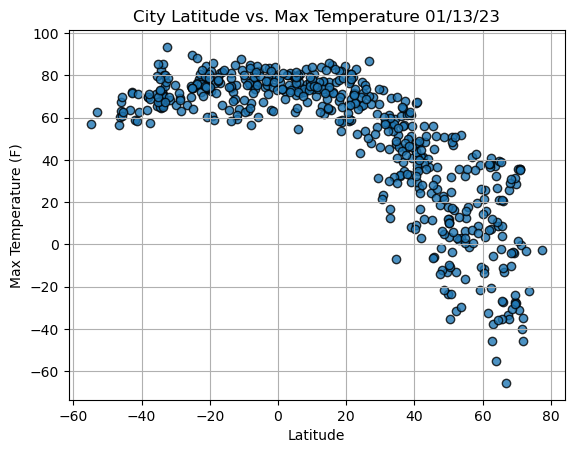

In [73]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/arashyousefi/Desktop/Analysis Project/Module-6/World_Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

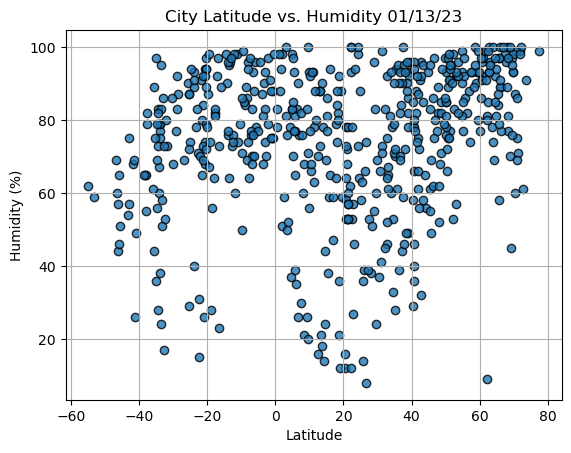

In [75]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/arashyousefi/Desktop/Analysis Project/Module-6/World_Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

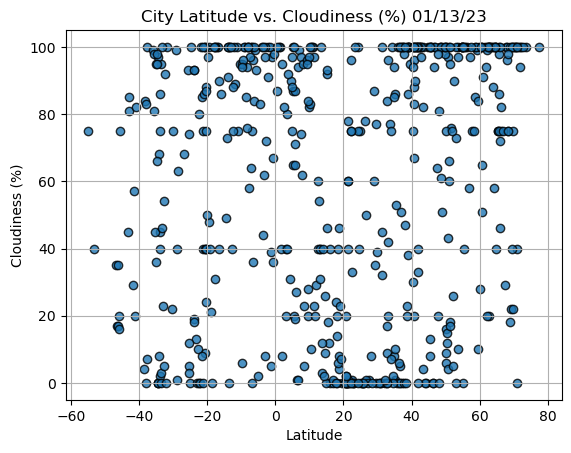

In [76]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/arashyousefi/Desktop/Analysis Project/Module-6/World_Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()


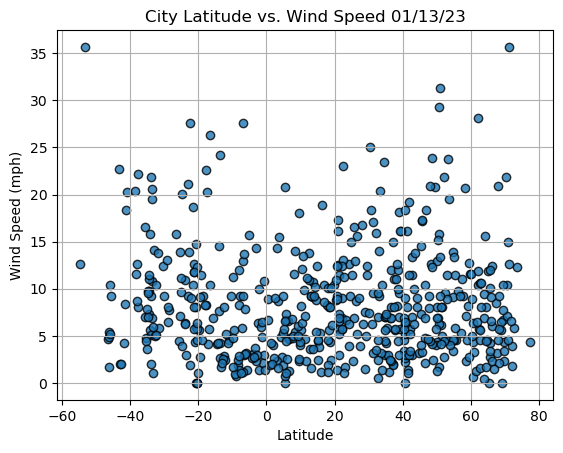

In [83]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/arashyousefi/Desktop/Analysis Project/Module-6/World_Weather_Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()

In [84]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [85]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2023-01-12 22:42:19
Lat                          -9.8
Lng                     -139.0333
Max Temp                     78.4
Humidity                       71
Cloudiness                      6
Wind Speed                  11.27
Name: 13, dtype: object

In [86]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thunder Bay,CA,2023-01-12 22:42:56,48.4001,-89.3168,22.98,68,100,12.66
1,Barrow,US,2023-01-12 22:44:32,71.2906,-156.7887,-0.38,71,100,35.68
7,Qaanaaq,GL,2023-01-12 22:44:35,77.4840,-69.3632,-2.49,99,100,4.32
10,Margate,GB,2023-01-12 22:44:36,51.3813,1.3862,47.10,77,18,5.01
11,Sal Rei,CV,2023-01-12 22:44:36,16.1833,-22.9167,72.01,65,0,18.86


In [87]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

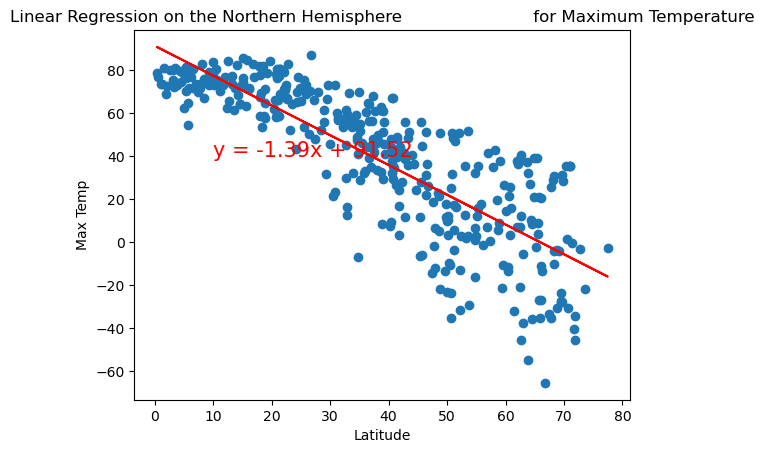

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

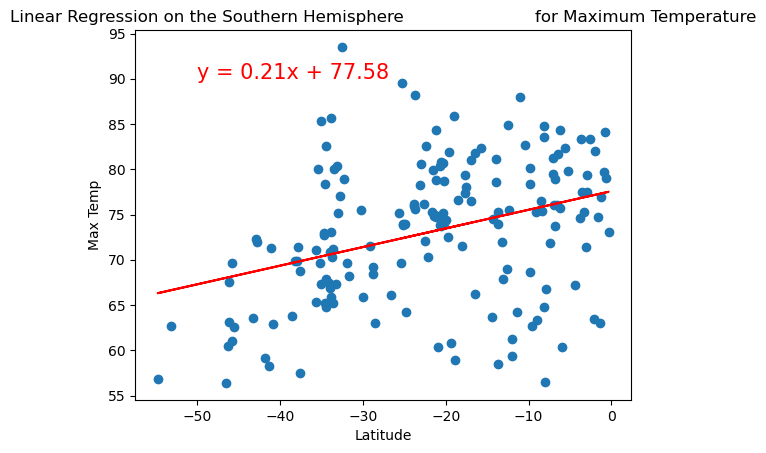

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

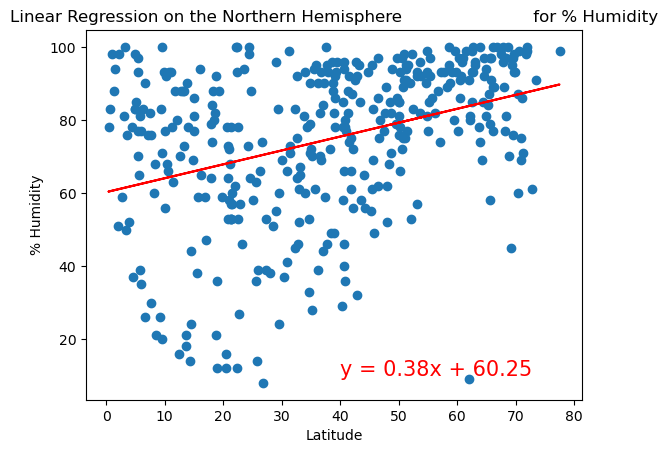

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

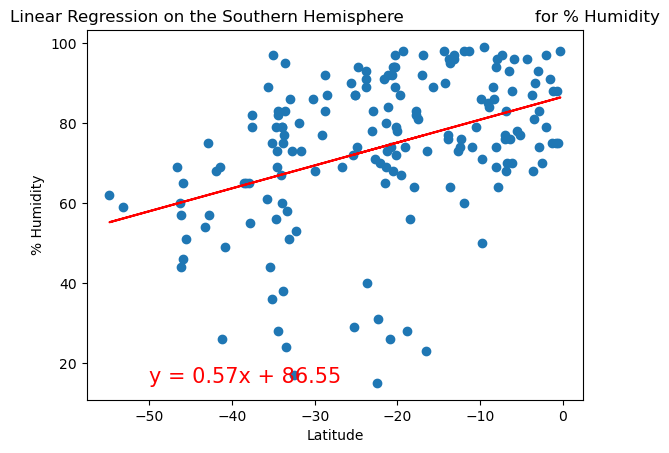

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

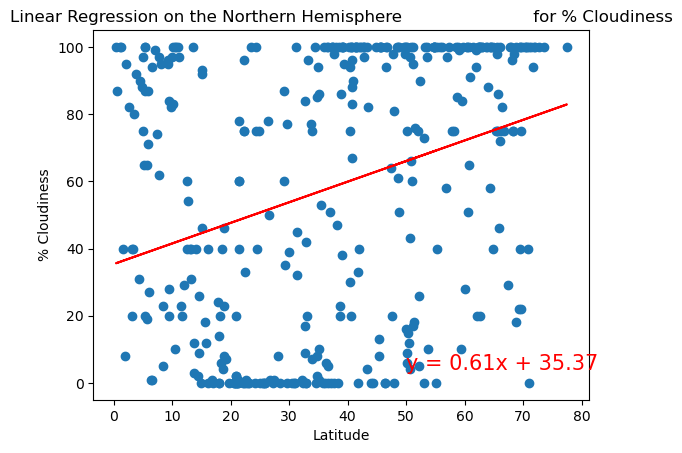

In [100]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,4))

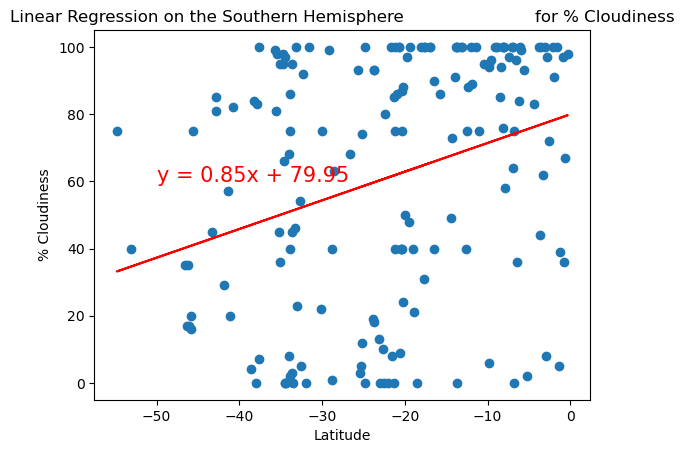

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

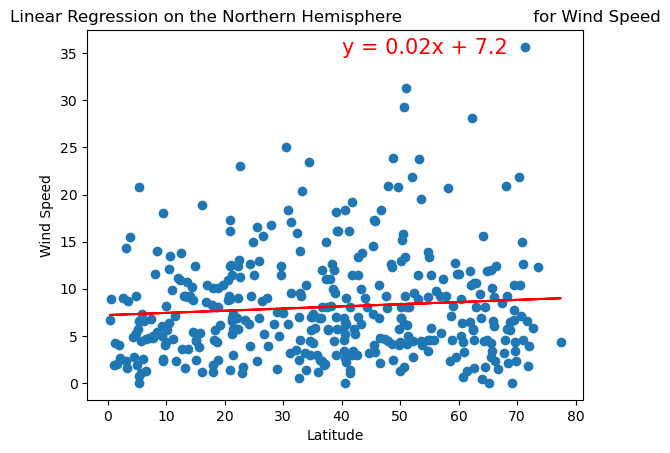

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

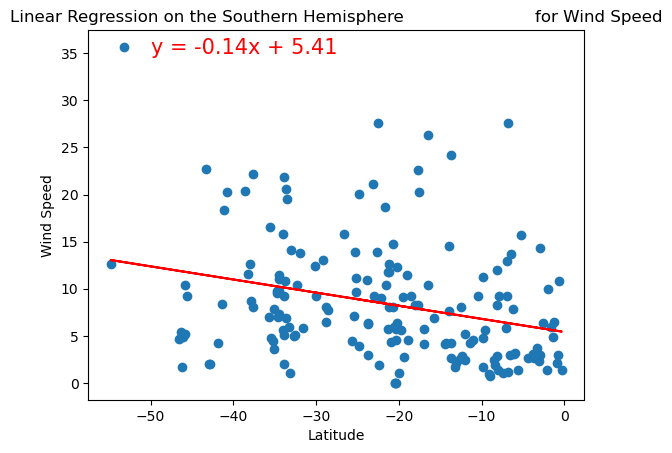

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))